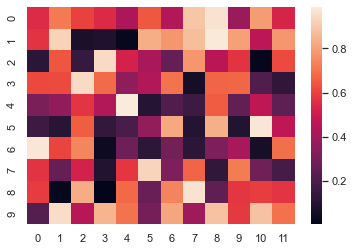

In [1]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [16]:
from simulator.dataset import RandomDataset
from feature.scaler import StandardScaler
from change_graph import ChangeGraph
import seaborn as sns
import numpy as np

100%|██████████| 100/100 [00:00<00:00, 3999.83it/s]


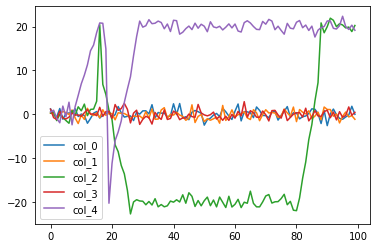

In [17]:
dataset = RandomDataset(cols=5,
                        changing_cols=2,
                        change_start=0,
                        num_changepoints=5,
                        drift_steps=10,
                        mean_ball=20,
                        size=100)

dataset.generate(True)
dataset.plot(True)

<AxesSubplot:>

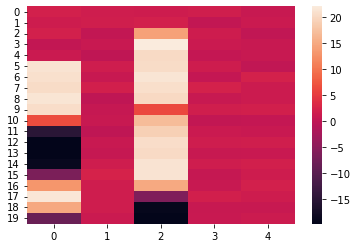

In [15]:
df = dataset.to_df(True)
data = df.to_numpy()
split = np.asarray(np.split(data, 20))
maxes = np.max(split, axis=1)

sns.heatmap(maxes)

In [1]:
from simulator.dataset import RandomDataset
from feature.scaler import StandardScaler
from change_graph import ChangeGraph
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

100%|██████████| 2000/2000 [00:00<00:00, 7690.77it/s]


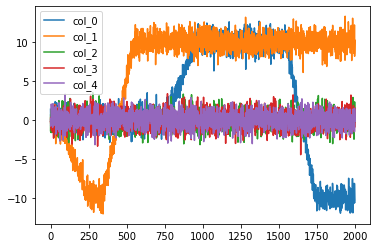

In [11]:
dataset = RandomDataset(cols=5,
                        changing_cols=2,
                        change_start=0,
                        num_changepoints=2,
                        drift_steps=200,
                        mean_ball=10,
                        size=2000)

dataset.generate(True)
dataset.plot(True)

In [12]:
df = dataset.to_df()
df.head()

,col_0,col_1,col_2,col_3,col_4,target_cols,mean_gradient,change
0,1.354835,0.228430,-1.390863,-0.228484,0.067868,None,0.0,0
1,-0.270683,-0.464356,0.711068,-0.336837,-0.805274,None,0.0,0
2,0.867809,0.104227,-1.609931,-1.034777,-0.443825,None,0.0,0
3,-0.394230,-1.608936,-0.231575,-0.478892,-0.403750,None,0.0,0
4,0.220524,-0.427045,1.328049,0.346989,0.415881,None,0.0,0


In [13]:
model = ChangeGraph(num_features=dataset.changing_cols,
                    cat_features=[],
                    window_size=15,
                    num_scaler=StandardScaler,
                    custom_start=0,
                    threshold=.6)
model

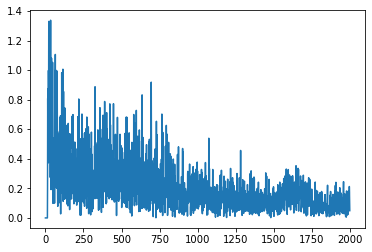

In [14]:
import numpy as np
from collections import defaultdict

scores = []
feature_data = defaultdict(list)
idx = []

for i, x in df.iterrows():
    x = x.to_dict()
    triggered, total_avg, cat, num = model.learn_one(i, x, None)
    num_avg, features, feature_scores = num
    for j, f in enumerate(features):
        feature_data[f].append(feature_scores[j])
    scores.append(num_avg)
    if triggered:
        idx.append(i)

# scores = np.asarray(scores)
feature_scores = np.asarray(list(zip(*feature_data.values())))

plt.plot(scores)
# plt.vlines(idx, 0, np.max(scores), color="red")
plt.show()

<AxesSubplot:>

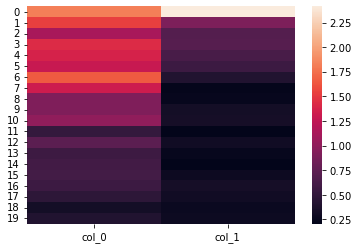

In [15]:
split = np.asarray(np.split(np.asarray(feature_scores), 20))
maxes = np.max(split, axis=1)

sns.heatmap(maxes, xticklabels=feature_data.keys())